Load and Prepare Data

In [20]:
import pandas as pd
df=pd.read_csv("housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [21]:
df.shape

(3479, 8)

In [22]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

Data Cleaning & missing values

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [24]:
df["Area"] = df["Area"].str.replace(',', '',regex=True).astype(int) 

In [25]:
df.isnull().sum()


Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   int64  
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 172.1+ KB


In [28]:
df.describe()

,Area,Room,Price,Price(USD)
count,3.456000e+03,3456.000000,3.456000e+03,3.456000e+03
mean,8.802191e+06,2.081308,5.379957e+09,1.793319e+05
std,3.177783e+08,0.759723,8.121729e+09,2.707243e+05
min,3.000000e+01,0.000000,3.600000e+06,1.200000e+02
25%,6.900000e+01,2.000000,1.420000e+09,4.733333e+04
50%,9.000000e+01,2.000000,2.900000e+09,9.666667e+04
75%,1.210000e+02,2.000000,6.000000e+09,2.000000e+05
max,1.616000e+10,5.000000,9.240000e+10,3.080000e+06


In [29]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   int64  
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 172.1+ KB


In [31]:
df.drop(columns='Price(USD)',inplace=True)

In [32]:
df['price_per_meter']=df['Price']/df['Area']

Visualization 

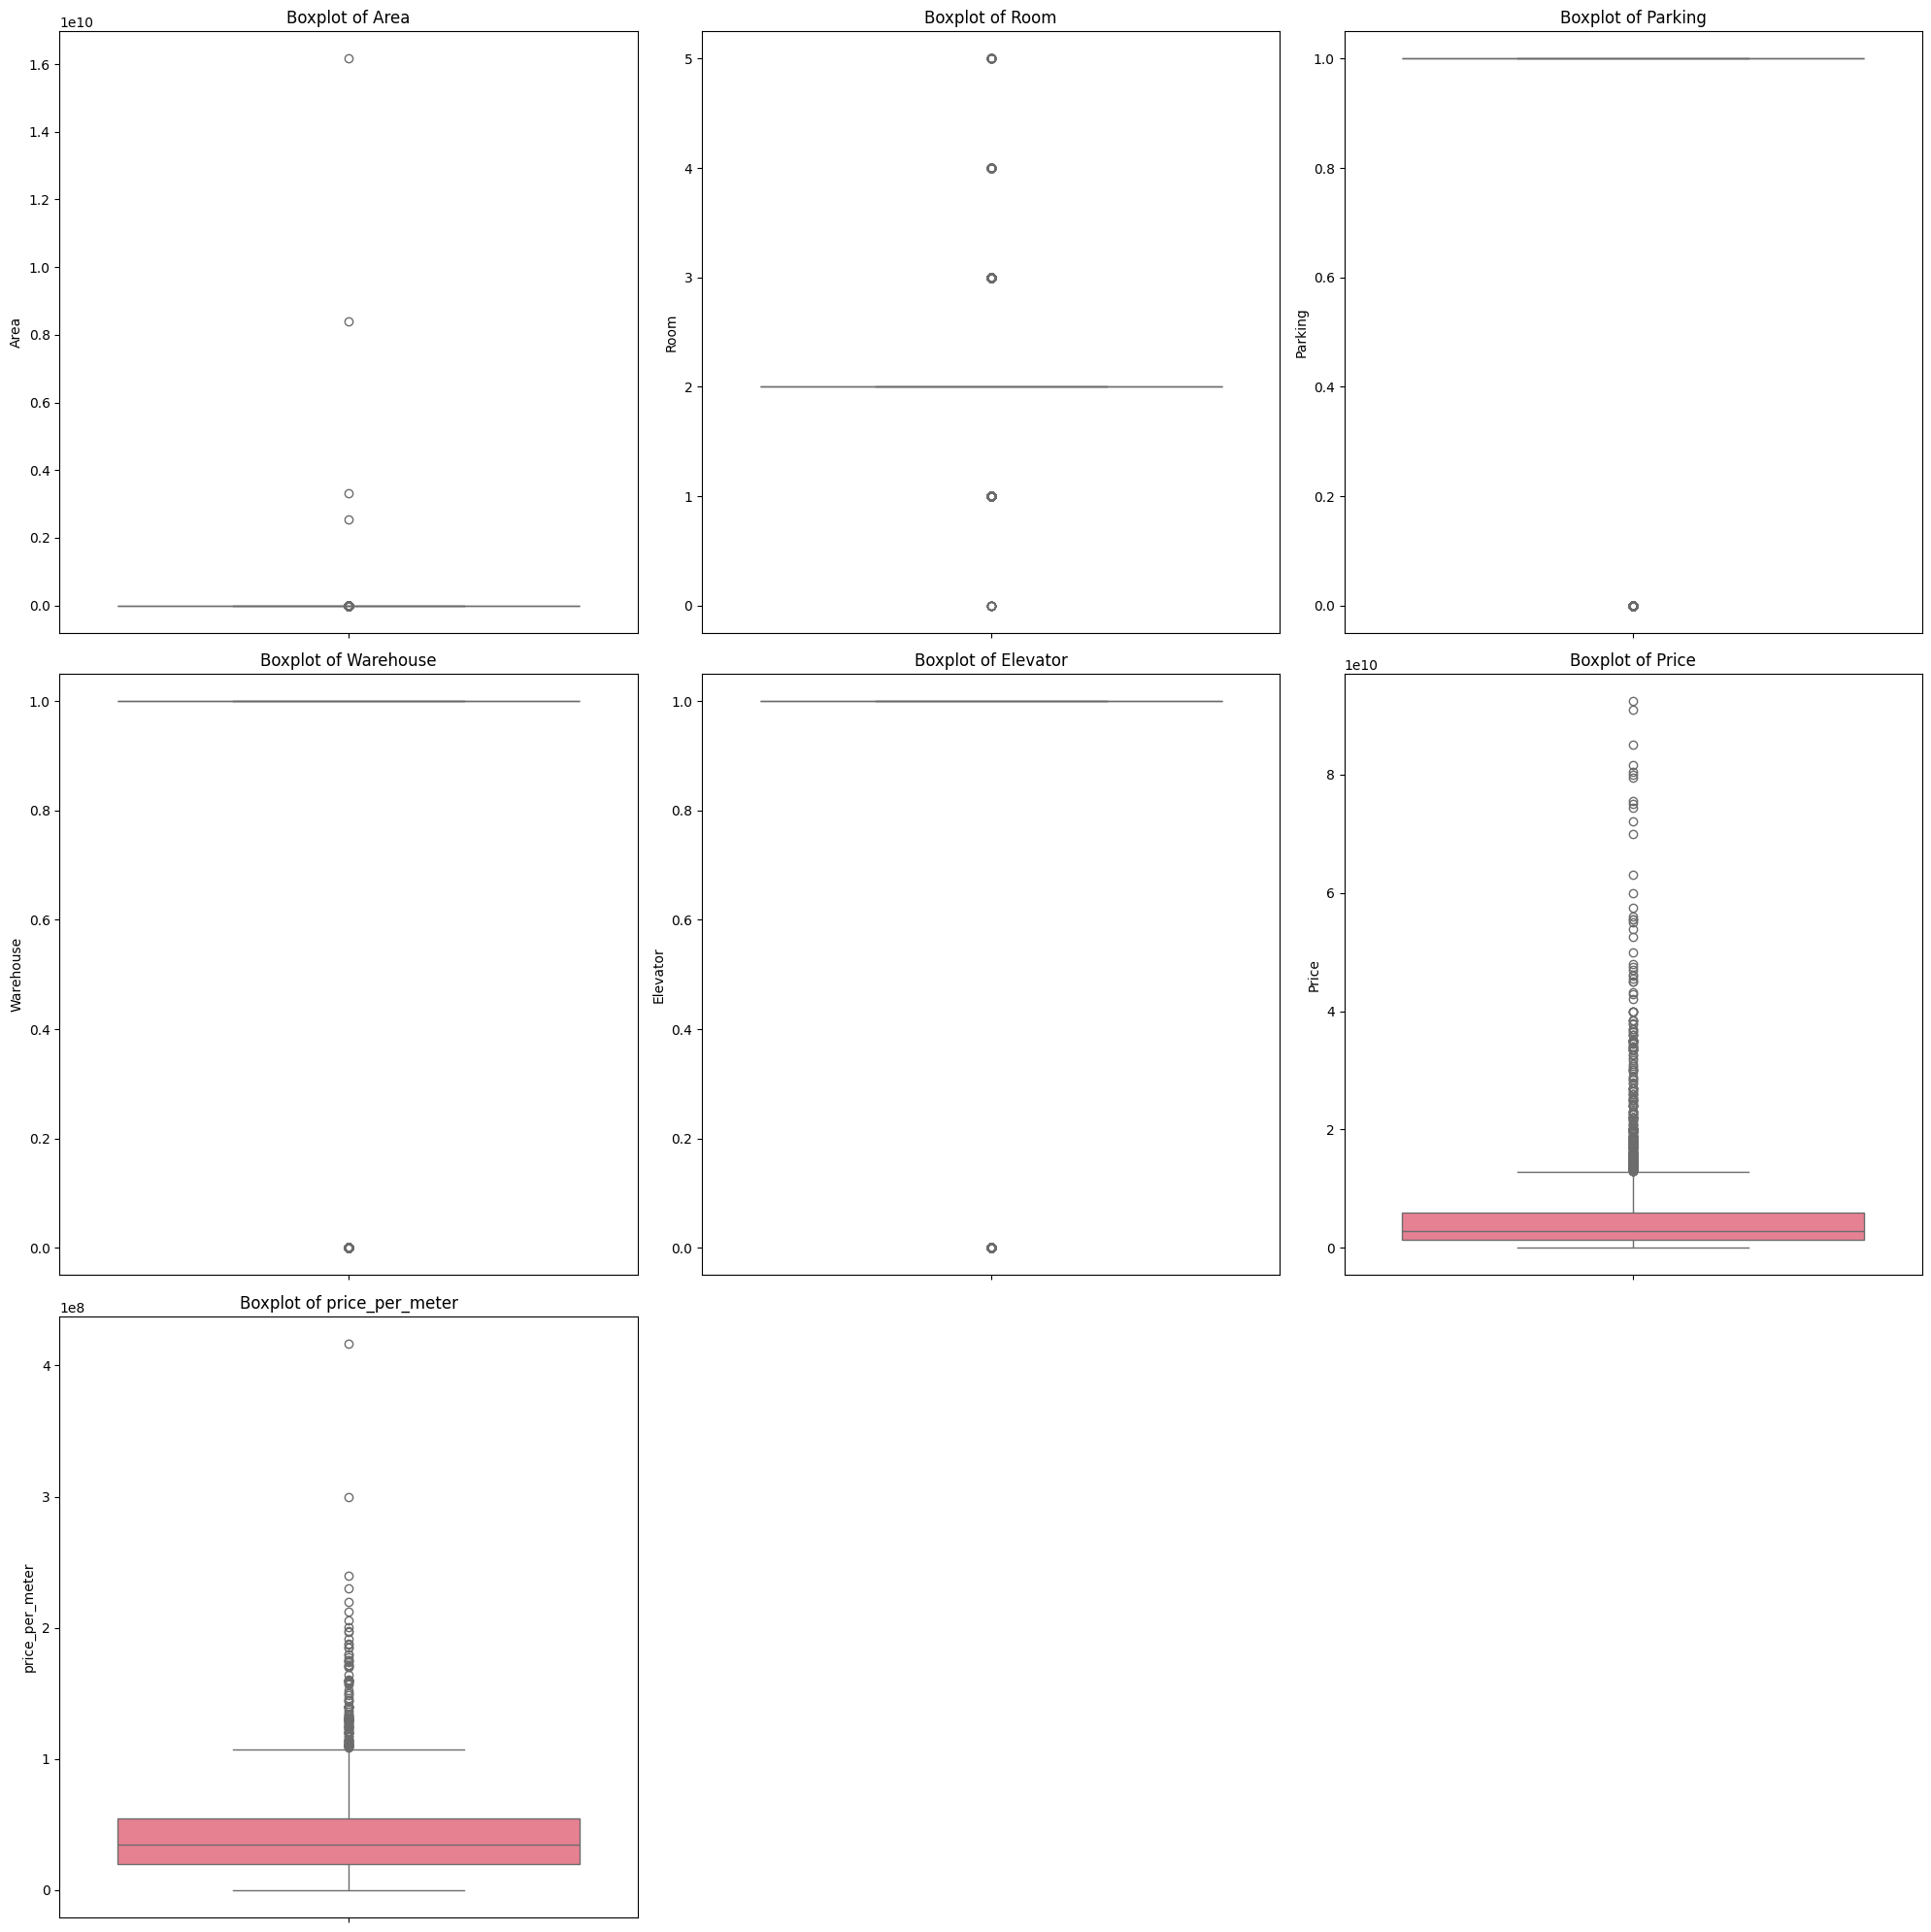

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# Identify numerical columns
features = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price','price_per_meter']]
# Define color palette
palette = sns.color_palette("husl",len(features))
#to show Outliers in data 
plt.figure(figsize=(20, 20))
for i, col in enumerate(features, 1):
    plt.subplot(3,3, i)
    sns.boxplot(y=df[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

C:\Users\Partiran\AppData\Local\Temp\ipykernel_2956\238463849.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="price_per_meter", data=df, palette="Set2")


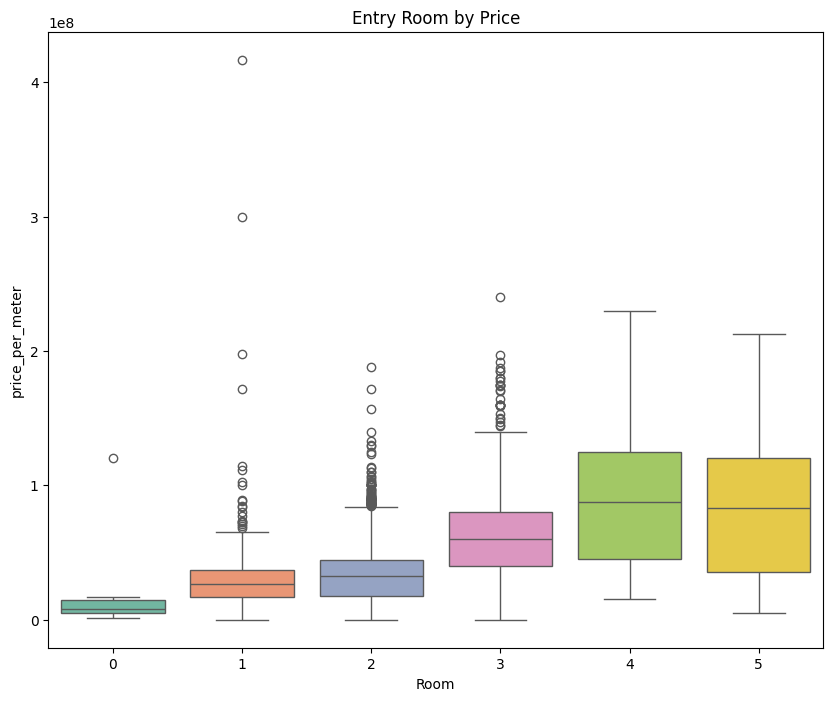

C:\Users\Partiran\AppData\Local\Temp\ipykernel_2956\238463849.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="price_per_meter", data=df, palette="Set2")


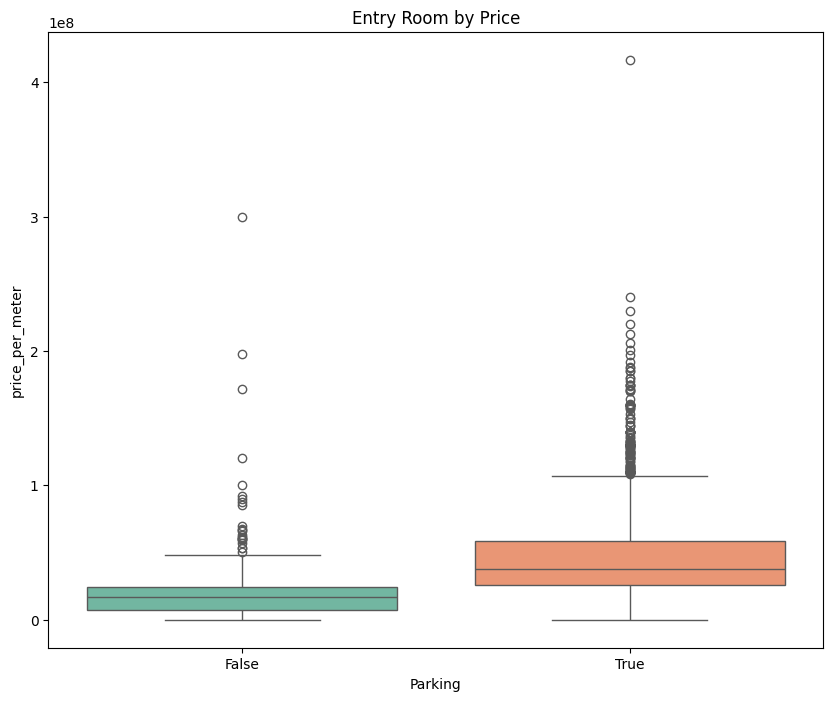

C:\Users\Partiran\AppData\Local\Temp\ipykernel_2956\238463849.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="price_per_meter", data=df, palette="Set2")


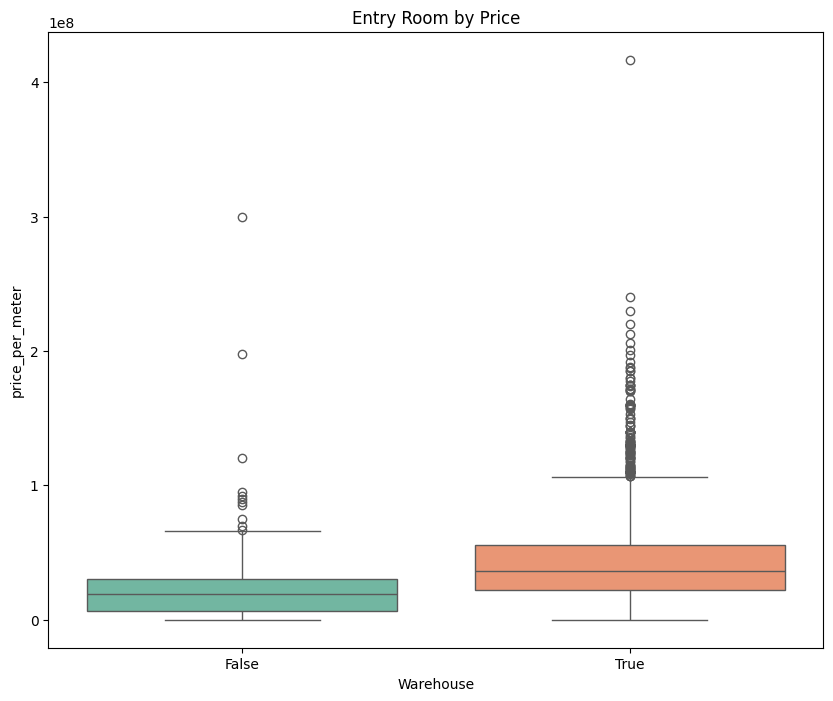

C:\Users\Partiran\AppData\Local\Temp\ipykernel_2956\238463849.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="price_per_meter", data=df, palette="Set2")


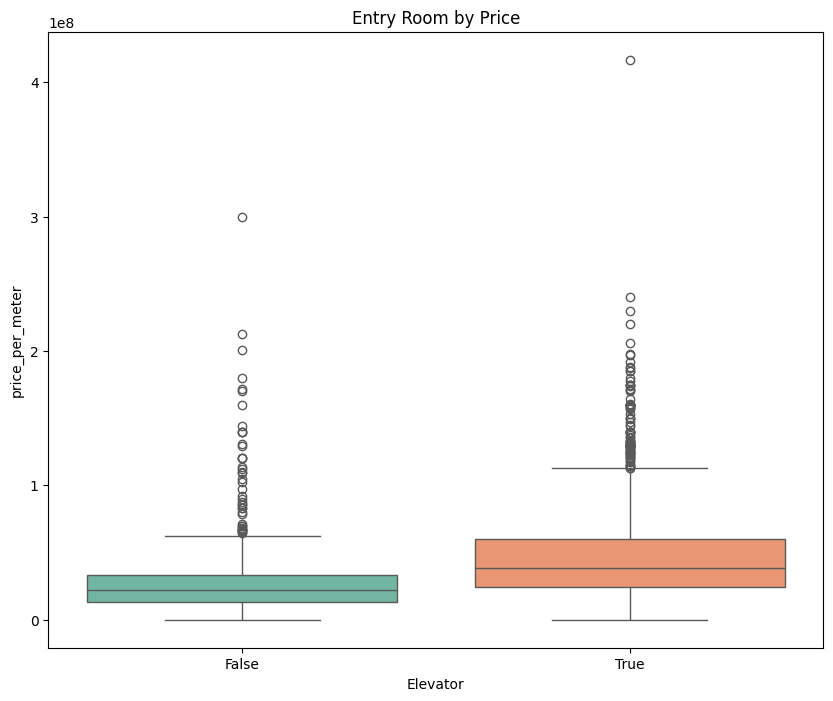

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical=df[['Room','Parking', 'Warehouse', 'Elevator']]

for col in categorical:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=col, y="price_per_meter", data=df, palette="Set2")
    plt.title("Entry Room by Price")
    plt.show()

C:\Users\Partiran\AppData\Local\Temp\ipykernel_2956\421051031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mean_house.index, y=top_mean_house.values,palette="Set2")


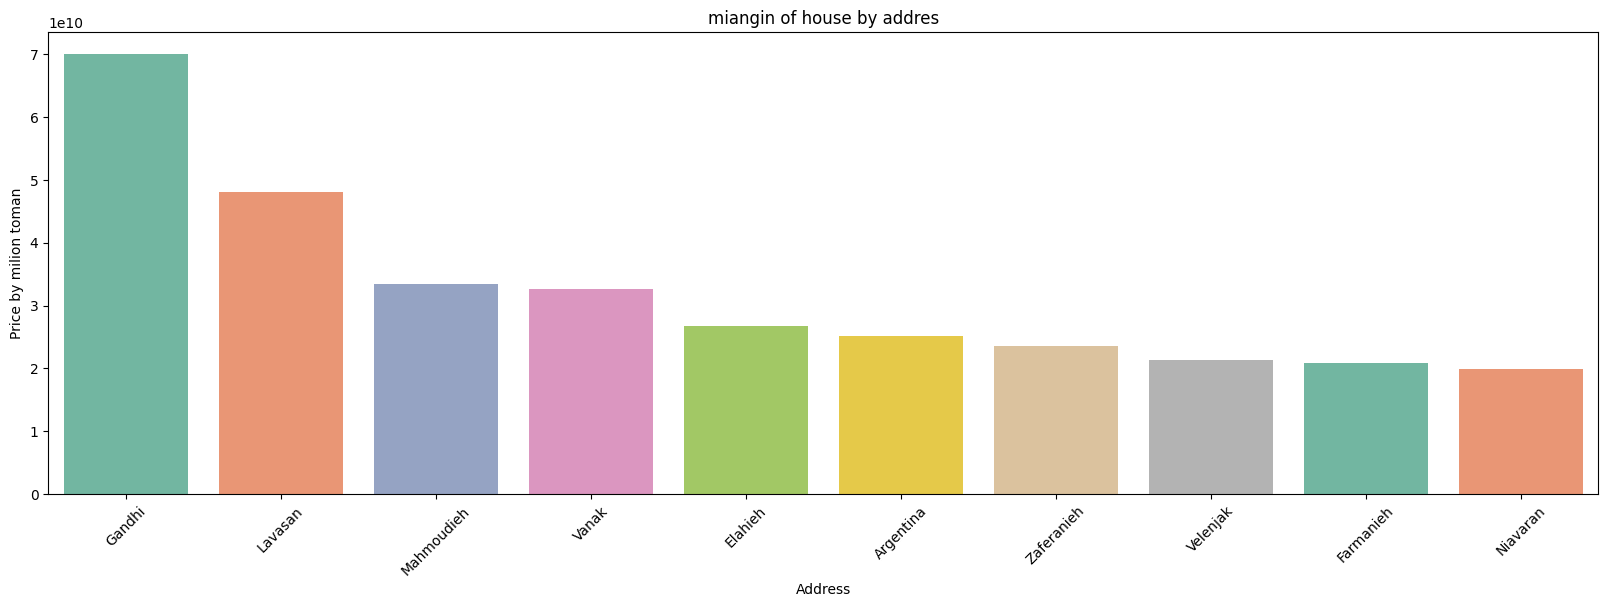

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

top_mean_house=df.groupby('Address')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(20,6))
sns.barplot(x=top_mean_house.index, y=top_mean_house.values,palette="Set2")
plt.title('miangin of house by addres')
plt.ylabel('Price by milion toman')
plt.xlabel('Address')
plt.xticks(rotation=45)
plt.show()

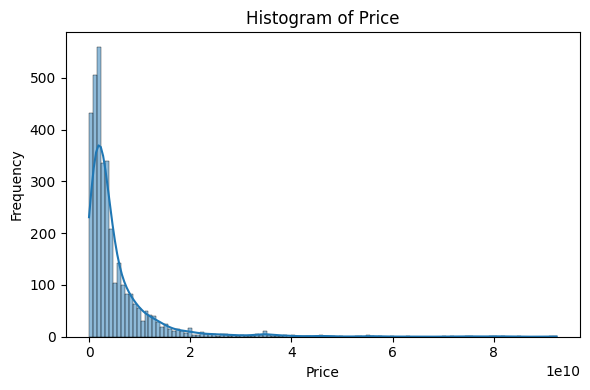

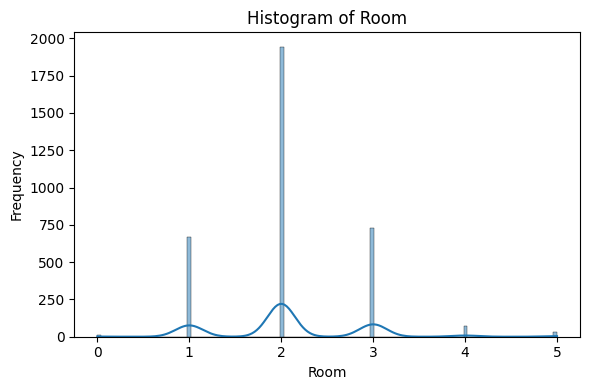

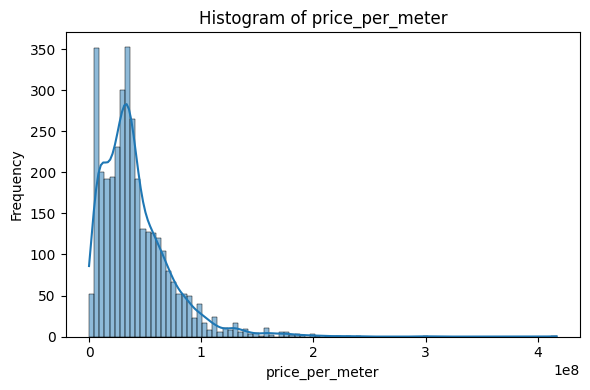

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns=df[['Price','Room','price_per_meter']]

for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(numerical_columns[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()



C:\Users\Partiran\AppData\Local\Temp\ipykernel_2956\951092546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col , palette='viridis')


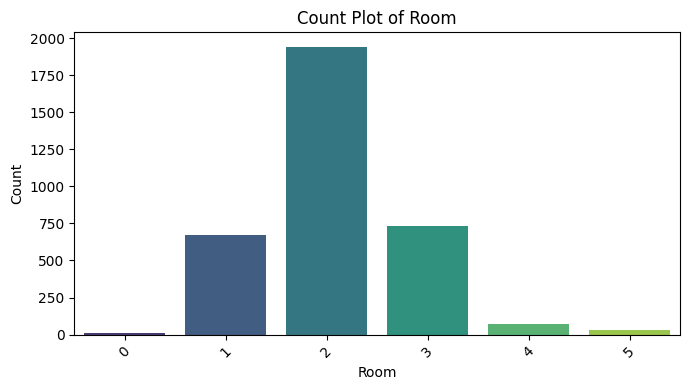

C:\Users\Partiran\AppData\Local\Temp\ipykernel_2956\951092546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col , palette='viridis')


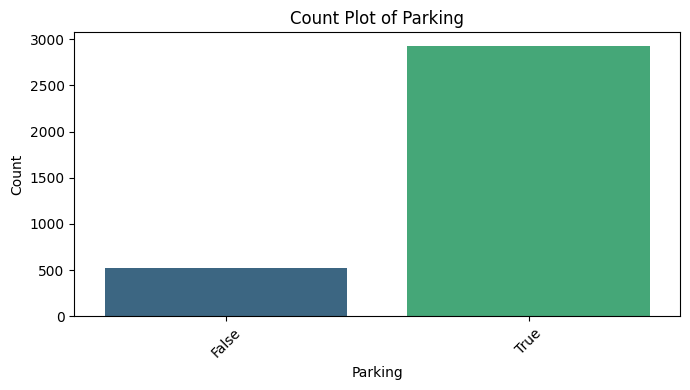

C:\Users\Partiran\AppData\Local\Temp\ipykernel_2956\951092546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col , palette='viridis')


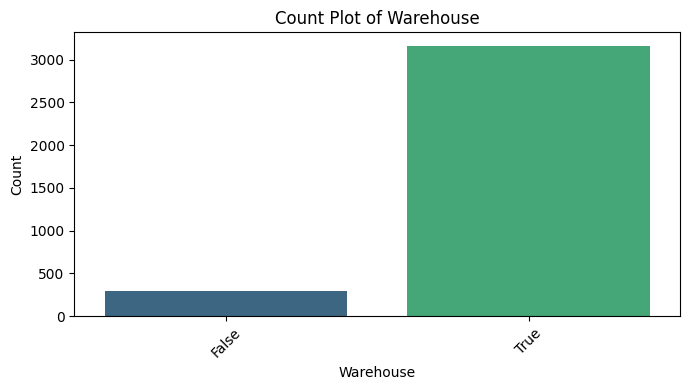

C:\Users\Partiran\AppData\Local\Temp\ipykernel_2956\951092546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col , palette='viridis')


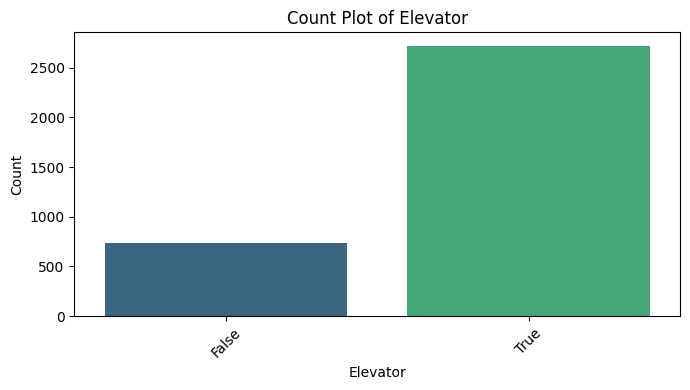

In [37]:
categorical_cols = ['Room', 'Parking', 'Warehouse', 'Elevator']
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.countplot(data=df,x=col , palette='viridis')
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [38]:
df[['Parking', 'Warehouse', 'Elevator']] = df[['Parking', 'Warehouse', 'Elevator']].astype(int)

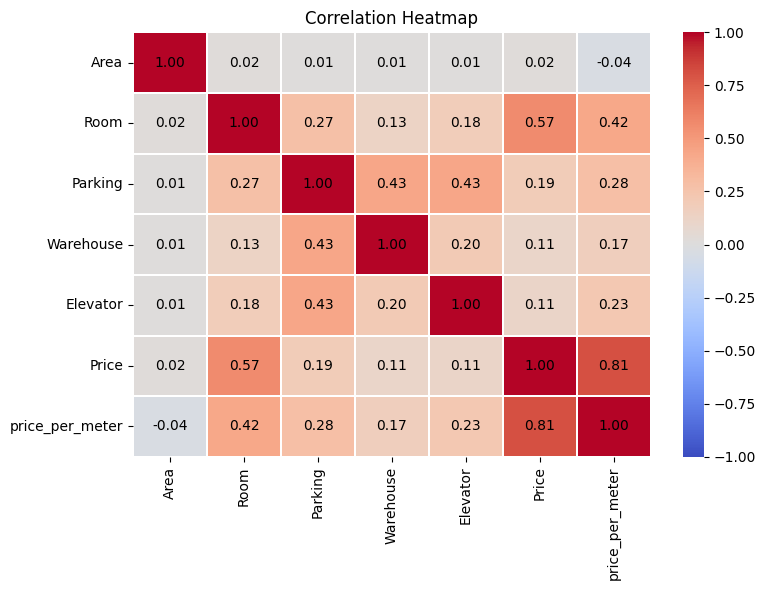

In [39]:

numericalcolumns=df.select_dtypes(include=['int64', 'float64'])
# Correlation Heatmap - ensure at least 2 numeric columns are available
if numericalcolumns.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    corr = numericalcolumns.corr()
    sns.heatmap(corr, cmap='coolwarm', fmt='.2f',annot_kws={'color': 'black'}, vmin=-1, vmax=1, linewidths=0.2, annot=True)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')



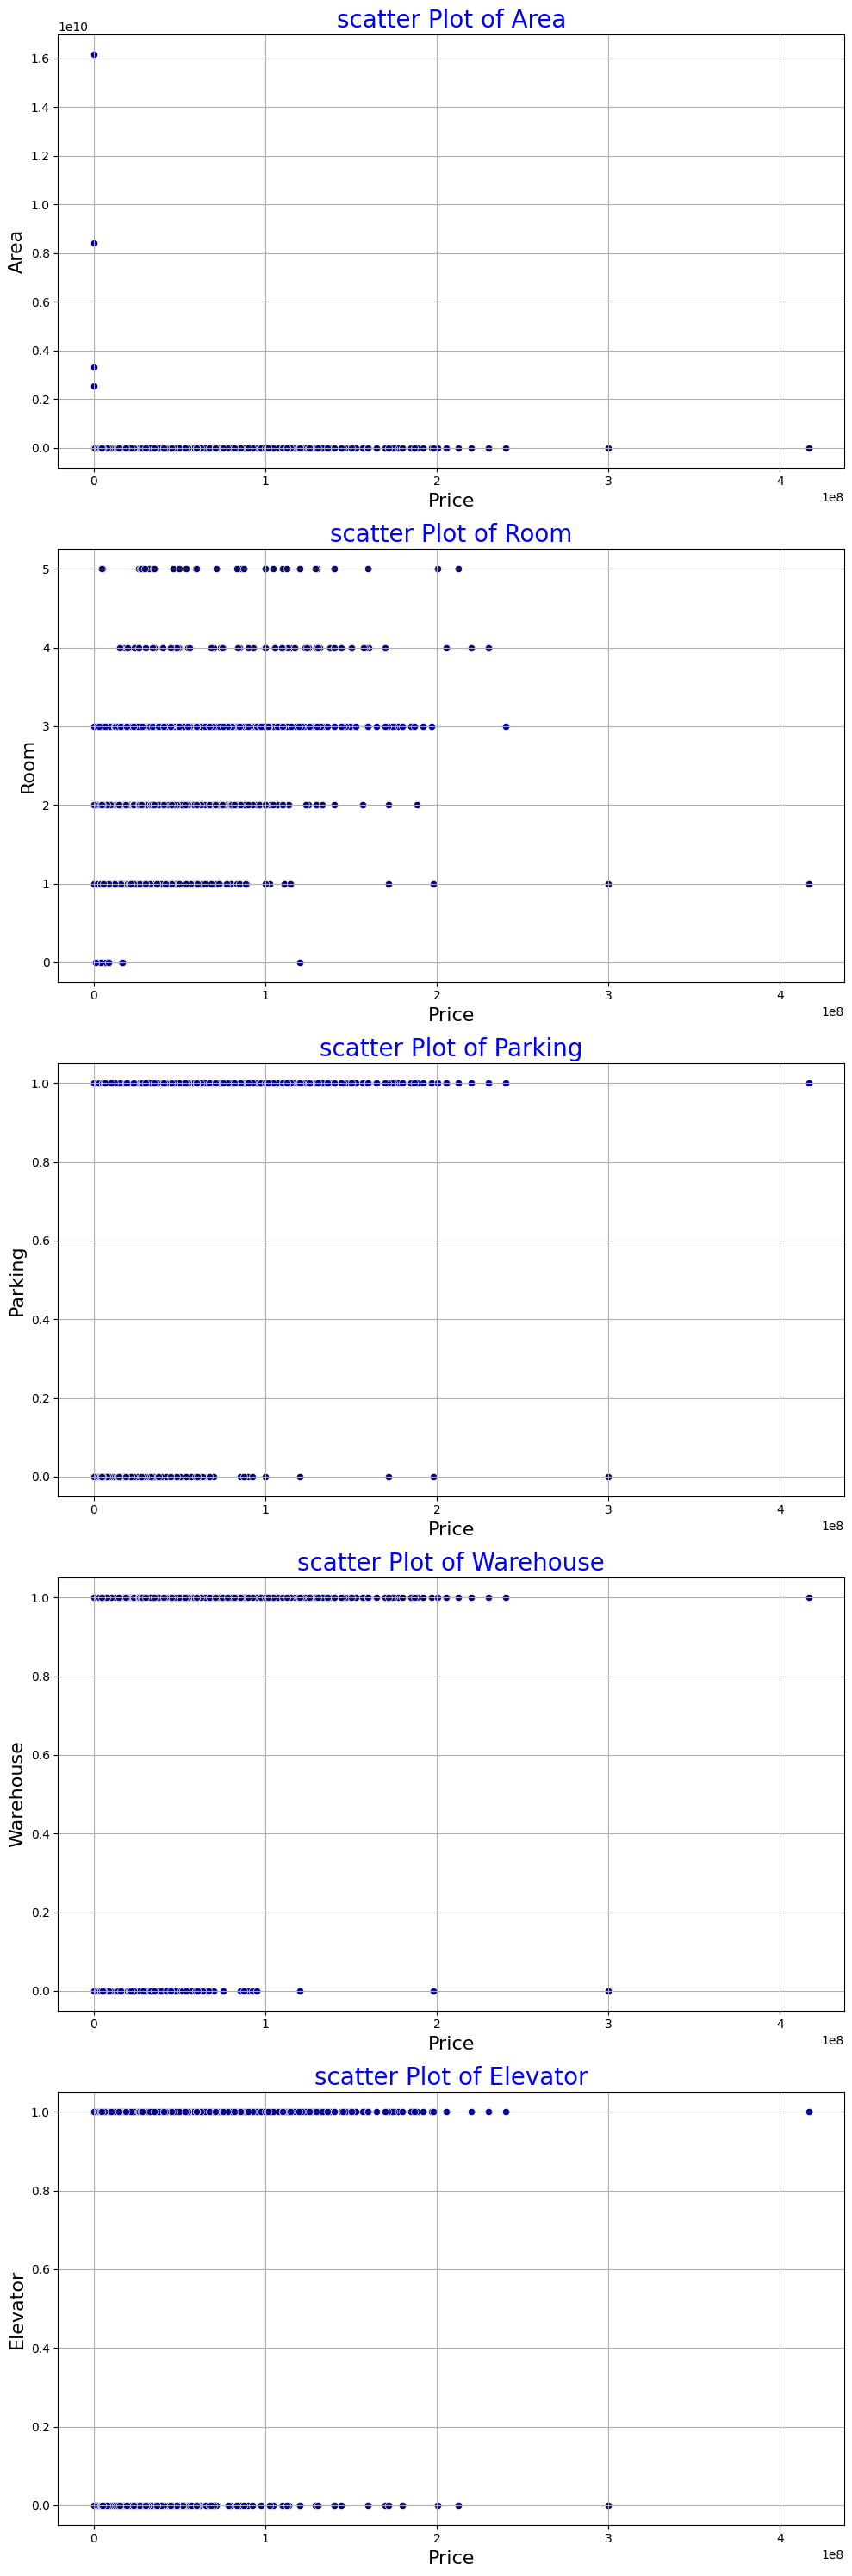

In [40]:
# checking the scatter plot to find outliers
features = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']

plt.figure(figsize=(10,30))
for idx, column in enumerate(features):
    plt.subplot(5, 1,  idx + 1)
    sns.scatterplot(x = df['price_per_meter'], y=df[column] , data = df, color='darkblue')
    plt.title(f'scatter Plot of {column}', color='blue', fontsize=20)
    plt.xlabel('Price', fontsize=16)
    plt.ylabel(column, fontsize=16)
    plt.grid()
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

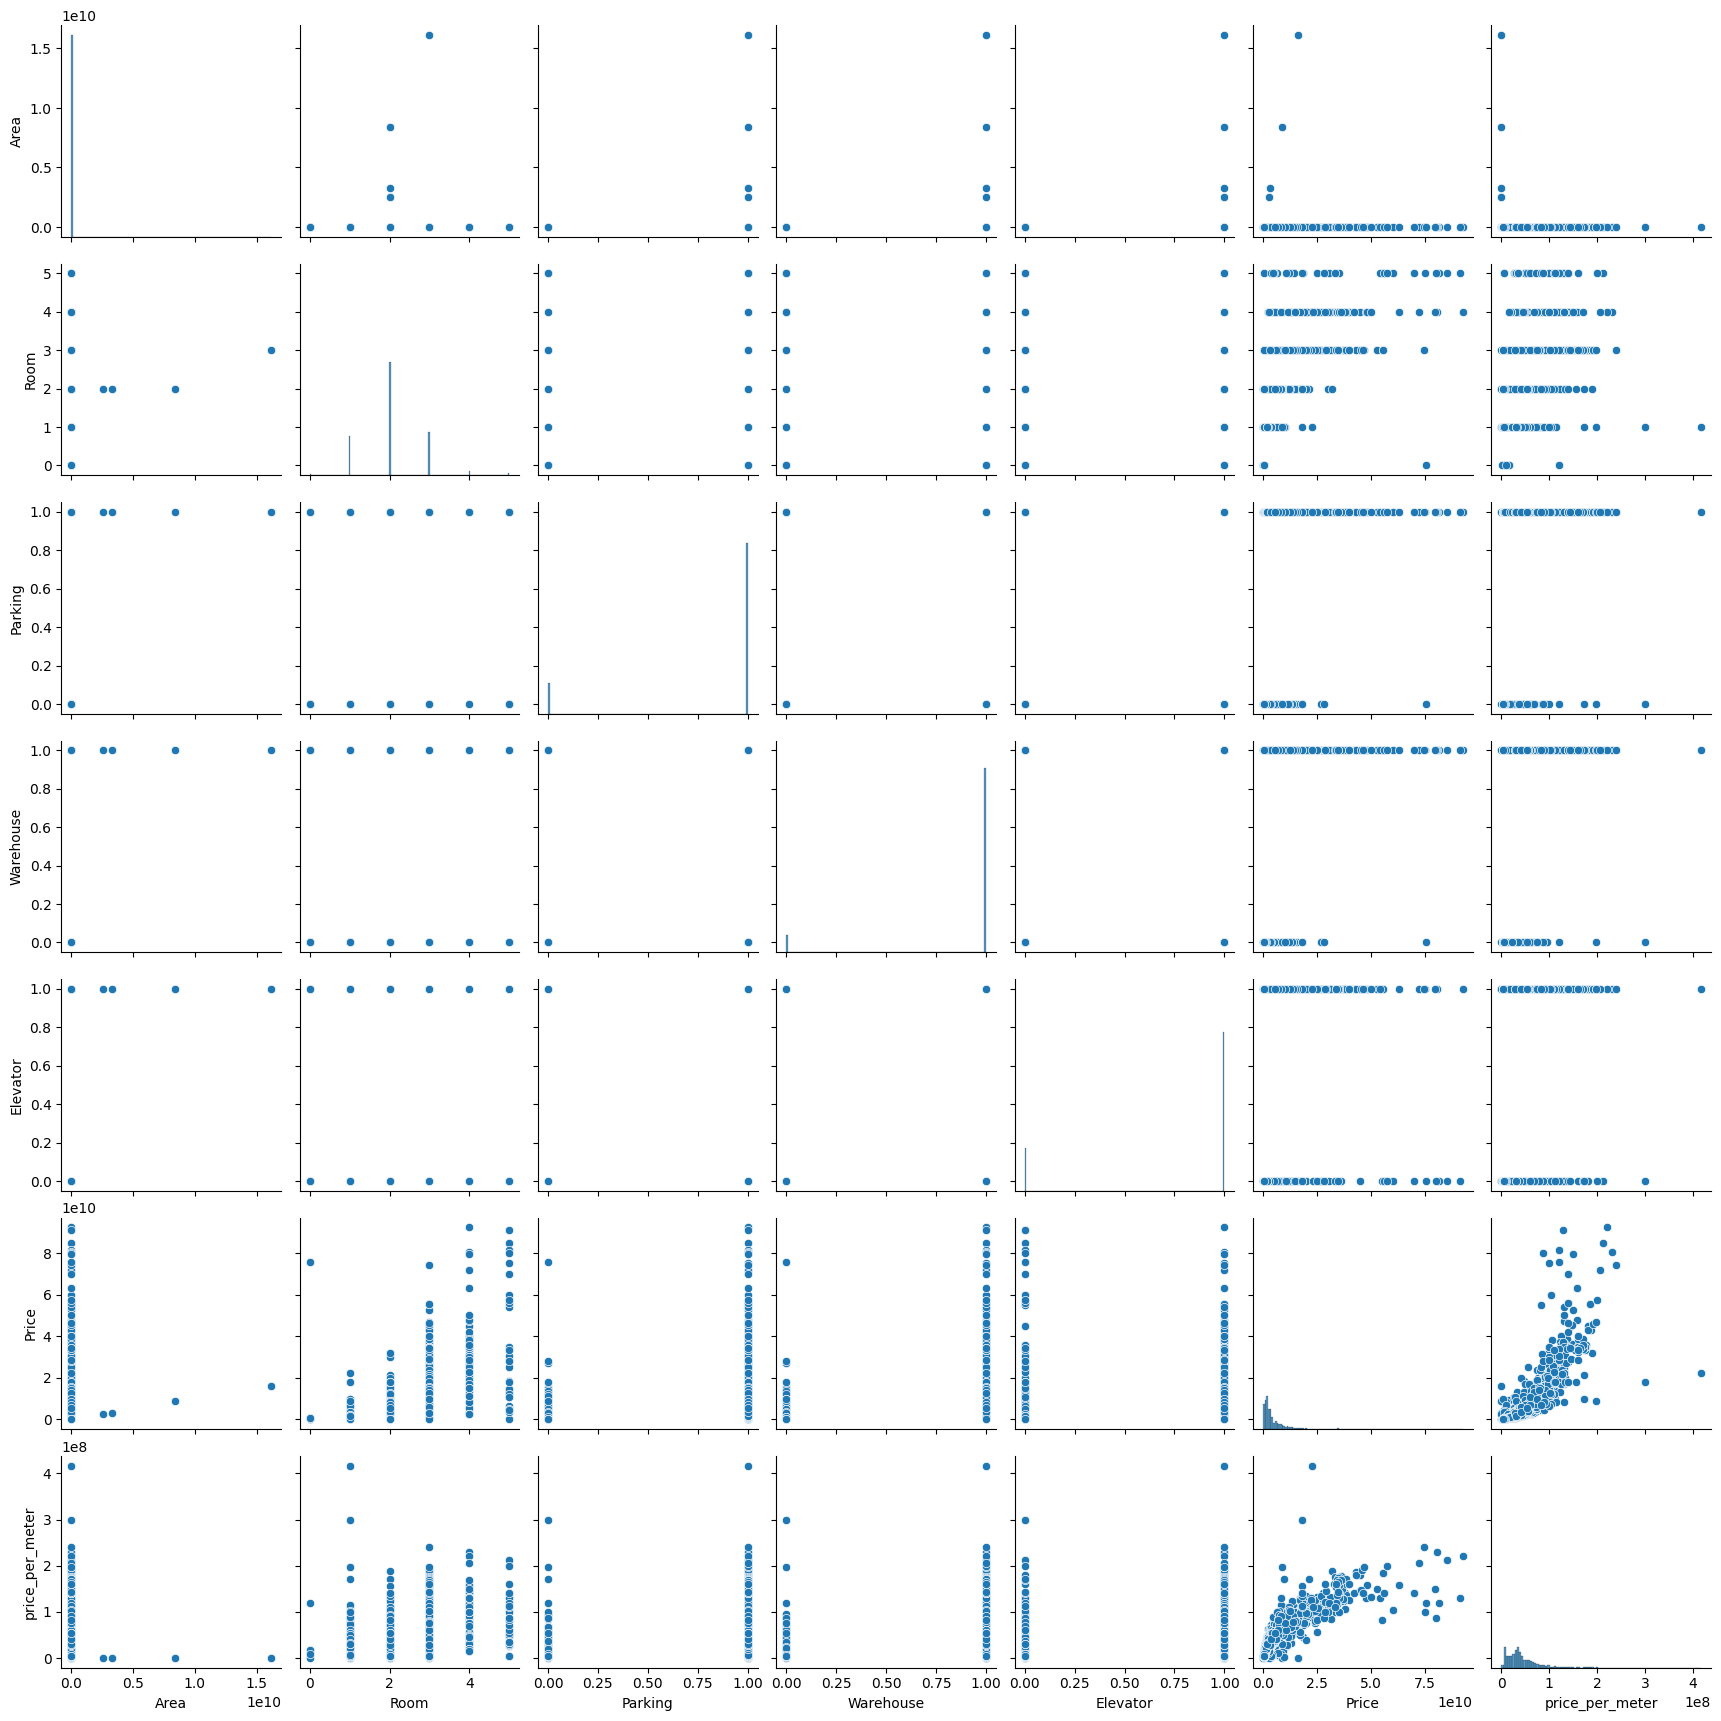

In [42]:
# Pair Plot to examine relationships among numeric variables
numericalcolumns=df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,6))
sns.pairplot(numericalcolumns)
plt.show()